In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import numpy as np
import pandas as pd
import graphviz

In [2]:
# Nombre de los ficheros
dataset = "HT_Sensor_dataset.dat"
metadata = "HT_Sensor_metadata.dat"
result = "results.dat"

df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column not in ["id"])
df.head()

df.describe()

,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000,297602.000000
mean,-0.037145,-0.042828,-0.220534,-0.045880,0.575419,0.016907,-0.374507,-0.349845,0.007603,-0.740505
std,19.773231,35.640831,37.791972,33.983393,253.749702,33.200443,58.639514,65.868393,6.779884,36.451878
min,-857.570527,-1131.547552,-1208.999629,-1230.915401,-18653.195489,-1260.888597,-4284.446529,-3412.894737,-195.744681,-737.160634
25%,-0.622877,-0.621793,-0.700469,-0.696012,-2.119280,-0.882629,-0.364730,-0.374271,-2.128862,-8.694016
50%,0.037573,0.101618,0.105243,0.112697,-0.037714,0.075287,0.031961,0.031997,-0.075287,-0.320030
75%,1.109023,1.444834,1.560081,1.488039,1.507940,1.467784,0.515425,0.535714,2.009390,7.160308
max,311.088997,829.411666,1052.124727,827.927383,7510.101389,1326.664152,4863.229206,4784.235250,169.049859,775.268990


[Text(0.5, 0.9285714285714286, 'X[1] <= 7.784\ngini = 0.475\nsamples = 208321\nvalue = [143691, 27348, 37282]'),
 Text(0.25, 0.7857142857142857, 'X[1] <= -8.264\ngini = 0.409\nsamples = 184902\nvalue = [138251, 24888, 21763]'),
 Text(0.125, 0.6428571428571429, 'X[1] <= -28.494\ngini = 0.471\nsamples = 14637\nvalue = [2535, 1951, 10151]'),
 Text(0.0625, 0.5, 'X[9] <= 64.235\ngini = 0.247\nsamples = 7709\nvalue = [550, 510, 6649]'),
 Text(0.03125, 0.35714285714285715, 'X[9] <= -53.244\ngini = 0.196\nsamples = 7021\nvalue = [460, 288, 6273]'),
 Text(0.015625, 0.21428571428571427, 'X[8] <= -0.254\ngini = 0.488\nsamples = 424\nvalue = [32, 112, 280]'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'X[1] <= -39.577\ngini = 0.17\nsamples = 6597\nvalue = [428, 176, 5993]'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.

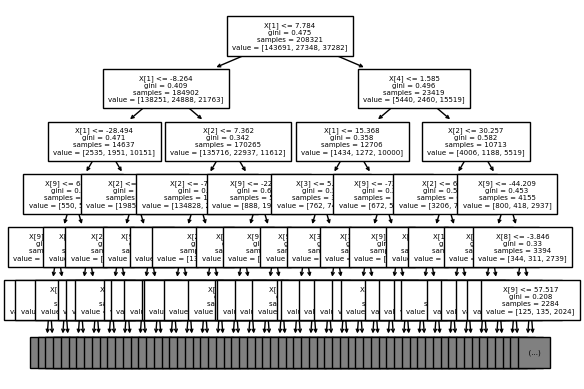

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
plot_tree(clf, max_depth=5, fontsize=5)

In [4]:
columns_names = df.columns.values
classes = df['Class'].unique().tolist()

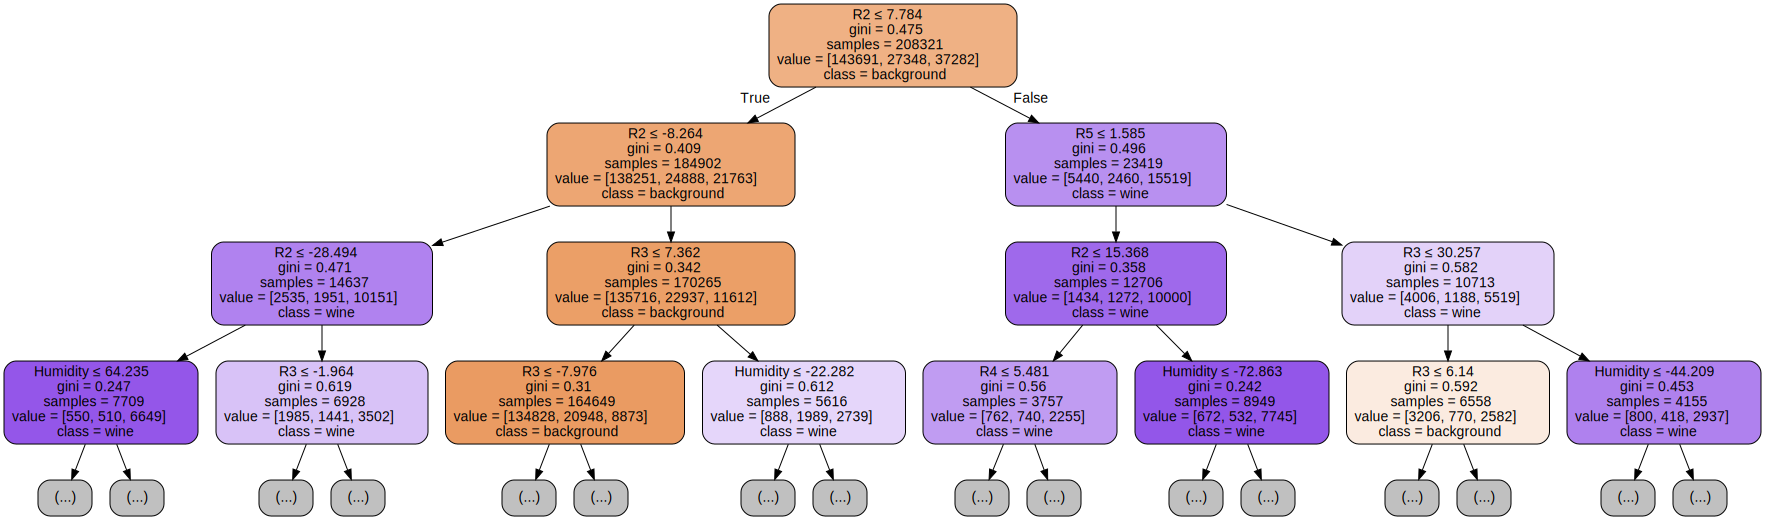

In [7]:
dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=columns_names[:-1],
                           class_names=classes,
                           max_depth=3)

graph = graphviz.Source(dot_data)
graph